In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# read weight-height dataset
url = "https://raw.githubusercontent.com/solaris33/data-science-for-all/main/lecture_4/weight-height.csv"
weight_height_df = pd.read_csv(url)

In [3]:
weight_height_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
# inch -> cm, lb -> kg
weight_height_df["Height"] = weight_height_df["Height"].apply(lambda x: x * 2.54)
weight_height_df["Weight"] = weight_height_df["Weight"].apply(lambda x: x * 0.4563)

In [5]:
weight_height_df.head()

,Gender,Height,Weight
0,Male,187.571423,110.376033
1,Male,174.706036,74.062269
2,Male,188.239668,97.073652
3,Male,182.196685,100.405379
4,Male,177.499761,94.157414


In [6]:
weight_height_df.shape

(10000, 3)

In [7]:
weight_height_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [8]:
weight_height_df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.665235
std,9.772721,14.651081
min,137.828359,29.522668
25%,161.304276,61.973777
50%,168.447898,73.561459
75%,175.702625,85.405454
max,200.656806,123.196299


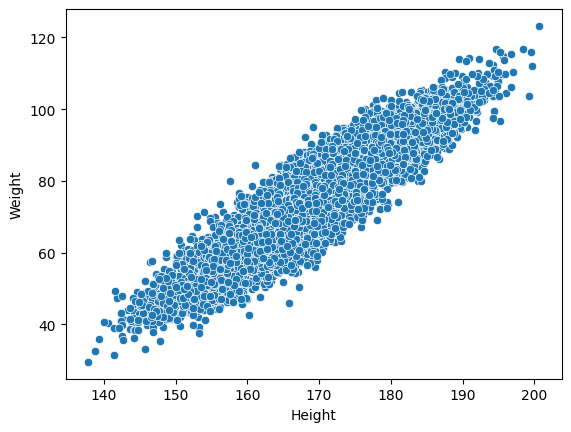

In [9]:
X = weight_height_df["Height"] # 입력데이터
y = weight_height_df["Weight"] # 정답데이터
sns.scatterplot(x = X, y = y)
plt.show()

In [10]:
# 80%는 트레이닝 데이터, 20%는 테스트 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
X_train

6482    151.486950
4068    167.294648
5945    158.018080
658     172.559647
555     178.986380
           ...    
4753    173.792262
5803    172.274776
672     187.404437
211     178.624874
5339    156.419982
Name: Height, Length: 8000, dtype: float64

In [17]:
X_train.values

array([151.48695025, 167.29464757, 158.01807979, ..., 187.40443718,
       178.62487375, 156.41998234])

In [15]:
X_train.values.shape

(8000,)

In [11]:
# 선형회귀(Linear Regression) 모델 선언하기
lr = LinearRegression()

In [18]:
# LinearRegression의 하이퍼파라미터
## copy_X= 입력 데이터의 복사 여부
## fit_intercept= 절편의 값을 계산 여부
## normalize= 정규화 여부
## n_jobs=데이터 분석에 사용할 코어의 개수

In [12]:
# 선형회귀(Linear Regression) 모델 학습하기
# reshape 부분을 유의!
lr.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [19]:
# 중요!! 입력 데이터는 무조건 2차원!!!
# 2차원 데이터로 바꾸는 방법
# 선형회귀에서 2차원 배열을 써야하는 이유 : 일차식을 계산할 때 2차원 벡터나 행렬을 사용하고, 2차원 행렬을 훈련 데이터로 쓰면 역행렬을 써서 회귀선의 기울기와 절편을 구하기 쉽다
## reshape(-1,1)
## [[X]]

In [21]:
# 테스트 데이터에 대한 예측을 수행합니다.
y_pred = lr.predict(X_test.values.reshape(-1,1))

In [22]:
y_pred

array([71.79256314, 55.90305631, 51.23075337, ..., 85.75585439,
       88.61874164, 99.71617122])

In [23]:
y_test

5498    71.156322
8945    55.571005
8859    59.053326
6372    57.803895
6985    74.640198
          ...    
1907    94.848488
1018    81.247562
1912    85.816707
2952    99.311025
4161    91.037814
Name: Weight, Length: 2000, dtype: float64

In [24]:
# MSE(Mean Squared Error)를 측정합니다.
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정합니다.
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

MSE : 30.23792147879922
RMSE : 5.498901842986399


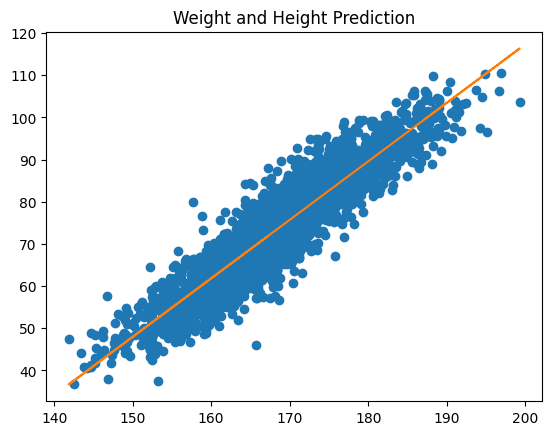

In [25]:
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, lr.predict(X_test.values.reshape(-1,1)))
plt.title('Weight and Height Prediction')
plt.show()